In [1]:
import pandas as pd
import matplotlib.pyplot as mp
import seaborn as sns
import numpy as np
from scipy.stats import norm, skew

pd.set_option('display.max_columns', None)

### 查看數據

In [2]:
train = pd.read_csv('train.csv')
print(train.shape)
train.head()

(614, 13)


,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [3]:
test = pd.read_csv('test.csv')
print(test.shape)
test.head()

(367, 12)


,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


### 合併訓練和測試的資料

In [4]:
df_all = train.append(test, ignore_index=True)
# 排除Lona_ID及Loan_Status
df_all = df_all.drop(['Loan_ID', 'Loan_Status'], axis=1)
df_all.describe()

/usr/local/lib/python3.5/dist-packages/pandas/core/frame.py:6692: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  sort=sort)


,ApplicantIncome,CoapplicantIncome,Credit_History,LoanAmount,Loan_Amount_Term
count,981.000000,981.000000,902.000000,954.000000,961.000000
mean,5179.795107,1601.916330,0.835920,142.511530,342.201873
std,5695.104533,2718.772806,0.370553,77.421743,65.100602
min,0.000000,0.000000,0.000000,9.000000,6.000000
25%,2875.000000,0.000000,1.000000,100.000000,360.000000
50%,3800.000000,1110.000000,1.000000,126.000000,360.000000
75%,5516.000000,2365.000000,1.000000,162.000000,360.000000
max,81000.000000,41667.000000,1.000000,700.000000,480.000000


#### 從上圖可得知ApplicantIncome、CoapplicantIncome、LoanAmount和Loan_Amount_Term有離散值

In [5]:
df_all.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 981 entries, 0 to 980
Data columns (total 11 columns):
ApplicantIncome      981 non-null int64
CoapplicantIncome    981 non-null float64
Credit_History       902 non-null float64
Dependents           956 non-null object
Education            981 non-null object
Gender               957 non-null object
LoanAmount           954 non-null float64
Loan_Amount_Term     961 non-null float64
Married              978 non-null object
Property_Area        981 non-null object
Self_Employed        926 non-null object
dtypes: float64(4), int64(1), object(6)
memory usage: 84.4+ KB


#### 從info資訊可知credit_History, Dependents, Gender, LoanAmount,  Loan_Amount_Term, Married及Self_Employed有缺失值。

### 查看屬性與核貸結果的關係

#### 視覺化並查看定性屬性與核貸結果的關係

<Figure size 432x288 with 0 Axes>

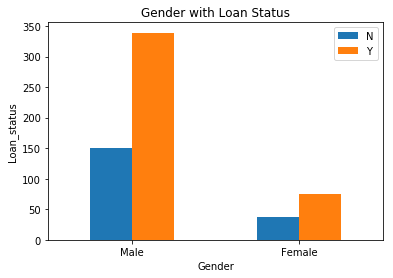

,N,Y,Total,Y_ratio
Male,150,339,489,69.33
Female,37,75,112,66.96


In [6]:
# 性別與貸款 
fig = mp.figure()
fig.set(alpha=0.2)

gender_Y = train.Gender[train.Loan_Status == 'Y'].value_counts()
gender_N = train.Gender[train.Loan_Status == 'N'].value_counts()

df = pd.DataFrame({'Y': gender_Y, 'N': gender_N})
df.plot(kind='bar')
mp.title('Gender with Loan Status')
mp.ylabel('Loan_status')
mp.xlabel('Gender')
mp.xticks(rotation=360)
mp.legend()
mp.show()
df['Total'] = df['N'] + df["Y"]
df["Y_ratio"] = (df['Y'] / (df['Total'])) * 100
df.style.format('{:.2f}', subset='Y_ratio')

<Figure size 432x288 with 0 Axes>

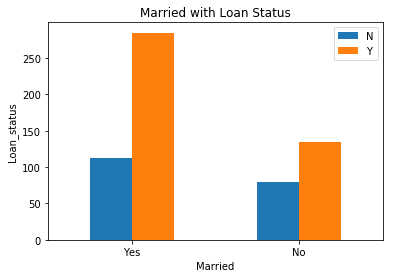

,N,Y,Total,Y_ratio
Yes,113,285,398,71.61
No,79,134,213,62.91


In [7]:
# 婚姻狀態與貸款 
fig = mp.figure()
fig.set(alpha=0.2)

married_Y = train.Married[train.Loan_Status == 'Y'].value_counts()
married_N = train.Married[train.Loan_Status == 'N'].value_counts()

df = pd.DataFrame({'Y': married_Y, 'N': married_N})
df.plot(kind='bar')
mp.title('Married with Loan Status')
mp.ylabel('Loan_status')
mp.xlabel('Married')
mp.xticks(rotation=360)
mp.legend()
mp.show()
df['Total'] = df['N'] + df["Y"]
df["Y_ratio"] = (df['Y'] / df['Total']) * 100
df.style.format('{:.2f}', subset='Y_ratio')

<Figure size 432x288 with 0 Axes>

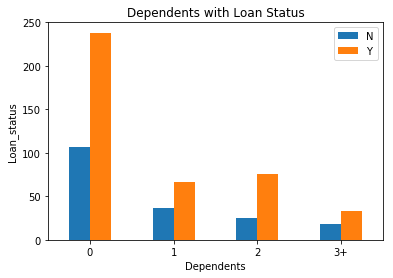

,N,Y,Total,Y_ratio
0,107,238,345,68.99
1,36,66,102,64.71
2,25,76,101,75.25
3+,18,33,51,64.71


In [8]:
# 扶養人數與貸款 
fig = mp.figure()
fig.set(alpha=0.2)

dep_Y = train.Dependents[train.Loan_Status == 'Y'].value_counts()
dep_N = train.Dependents[train.Loan_Status == 'N'].value_counts()

df = pd.DataFrame({'Y':dep_Y, 'N': dep_N})
df.plot(kind='bar')
mp.title('Dependents with Loan Status')
mp.ylabel('Loan_status')
mp.xlabel('Dependents')
mp.xticks(rotation=360)
mp.legend()
mp.show()
df['Total'] = df['N'] + df["Y"]
df["Y_ratio"] = (df['Y'] / (df['Total'])) * 100
df.style.format('{:.2f}', subset='Y_ratio')

<Figure size 432x288 with 0 Axes>

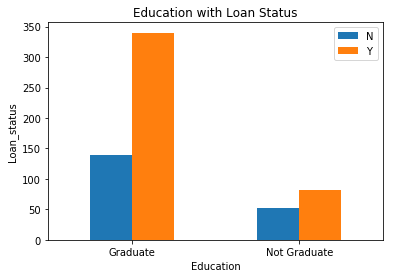

,N,Y,Total,Y_ratio
Graduate,140,340,480,70.83
Not Graduate,52,82,134,61.19


In [9]:
# 教育與貸款 
fig = mp.figure()
fig.set(alpha=0.2)

edu_Y = train.Education[train.Loan_Status == 'Y'].value_counts()
edu_N = train.Education[train.Loan_Status == 'N'].value_counts()

df = pd.DataFrame({'Y':edu_Y, 'N': edu_N})
df.plot(kind='bar')
mp.title('Education with Loan Status')
mp.ylabel('Loan_status')
mp.xlabel('Education')
mp.xticks(rotation=360)
mp.legend()
mp.show()
df['Total'] = df['N'] + df["Y"]
df["Y_ratio"] = (df['Y'] / (df['Total'])) * 100
df.style.format('{:.2f}', subset='Y_ratio')

<Figure size 432x288 with 0 Axes>

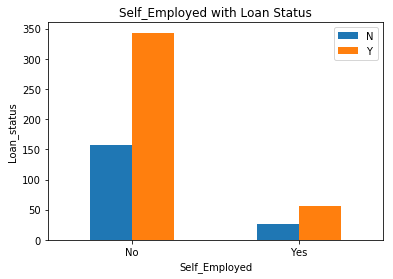

,N,Y,Total,Y_ratio
No,157,343,500,68.60
Yes,26,56,82,68.29


In [10]:
# 是否自行創業與貸款 
fig = mp.figure()
fig.set(alpha=0.2)

SE_Y = train.Self_Employed[train.Loan_Status == 'Y'].value_counts()
SE_N = train.Self_Employed[train.Loan_Status == 'N'].value_counts()

df = pd.DataFrame({'Y':SE_Y, 'N':SE_N})
df.plot(kind='bar')
mp.title('Self_Employed with Loan Status')
mp.ylabel('Loan_status')
mp.xlabel('Self_Employed')
mp.xticks(rotation=360)
mp.legend()
mp.show()
df['Total'] = df['N'] + df["Y"]
df["Y_ratio"] = (df['Y'] / (df['Total'])) * 100
df.style.format('{:.2f}', subset='Y_ratio')

<Figure size 432x288 with 0 Axes>

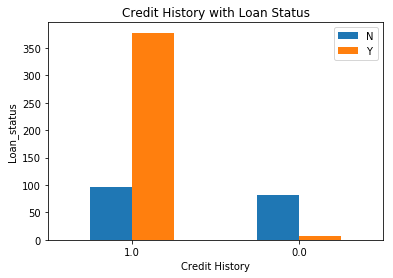

,N,Y,Total,Y_ratio
1.0,97,378,475,79.58
0.0,82,7,89,7.87


In [11]:
# 信用紀錄與貸款
# 0:無信用紀錄 1:有信用紀錄 
fig = mp.figure()
fig.set(alpha=0.2)

ch_Y = train.Credit_History[train.Loan_Status == 'Y'].value_counts()
ch_N = train.Credit_History[train.Loan_Status == 'N'].value_counts()

df = pd.DataFrame({'Y':ch_Y, 'N':ch_N})
df.plot(kind='bar')
mp.title('Credit History with Loan Status')
mp.ylabel('Loan_status')
mp.xlabel('Credit History')
mp.xticks(rotation=360)
mp.legend()
mp.show()
df['Total'] = df['N'] + df["Y"]
df["Y_ratio"] = (df['Y'] / (df['Total'])) * 100
df.style.format('{:.2f}', subset='Y_ratio')

<Figure size 432x288 with 0 Axes>

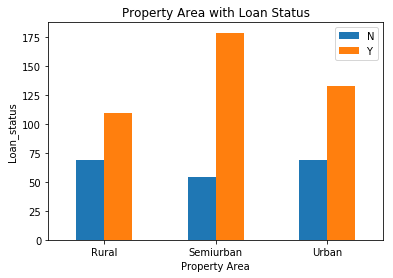

,N,Y,Total,Y_ratio
Rural,69,110,179,61.45
Semiurban,54,179,233,76.82
Urban,69,133,202,65.84


In [12]:
# 房屋地區與貸款 
fig = mp.figure()
fig.set(alpha=0.2)

PA_Y = train.Property_Area[train.Loan_Status == 'Y'].value_counts()
PA_N = train.Property_Area[train.Loan_Status == 'N'].value_counts()

df = pd.DataFrame({'Y':PA_Y, 'N':PA_N})
df.plot(kind='bar')
mp.title('Property Area with Loan Status')
mp.ylabel('Loan_status')
mp.xlabel('Property Area')
mp.xticks(rotation=360)
mp.legend()
mp.show()
df['Total'] = df['N'] + df["Y"]
df["Y_ratio"] = (df['Y'] / (df['Total'])) * 100
df.style.format('{:.2f}', subset='Y_ratio')

### 從上圖可得知定性屬性與核貸結果關係:
#### 性別: 男性申請總數高於女生, 但成功核貸比率其實男女差距不大。
#### 婚姻: 已婚申請總數高於未婚, 成功核貸比率也相對比未婚高
#### 扶養人數: 撫養人數為0的申請總數多, 但成功核貸比率反而是撫養人數為2較高。
#### 教育程度: 有大學畢業申請總數較多, 成功核貸比率也較高。
#### 自行創業: 未自行創業申請總數較多, 兩者成功核貸比率差距不大。
#### 信用紀錄: 有信用紀錄的申請總數較多且成功核貸比率偏高。
#### 房屋區域: 半郊區的申請總數較多且成功核貸比率較高。
#### 綜合以上幾個屬性可以發現是否有信用紀錄影響核貸結果較大。

#### 查看定量的連續分佈

mu = 5179.80, sigma = 5692.20


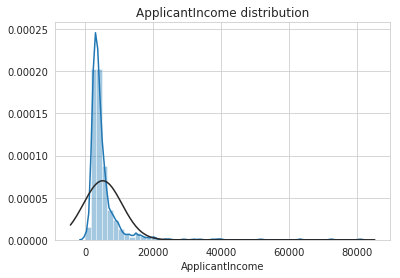

In [13]:
# 申請人收入
(mu, sigma) = norm.fit(df_all['ApplicantIncome'])
print('mu = {:.2f}, sigma = {:.2f}'.format(mu,sigma))

sns.set_style('whitegrid')
sns.distplot(df_all['ApplicantIncome'], fit=norm)
mp.title('ApplicantIncome distribution')
mp.show()

#### 圖形偏左,非常態分佈

mu = 8.31, sigma = 0.72


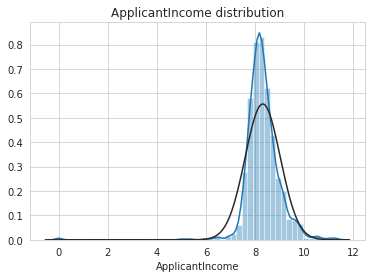

In [14]:
# 使用log修正
df_all['ApplicantIncome'] = np.log1p(df_all['ApplicantIncome'])
(mu, sigma) = norm.fit(df_all['ApplicantIncome'])
print('mu = {:.2f}, sigma = {:.2f}'.format(mu,sigma))

sns.set_style('whitegrid')
sns.distplot(df_all['ApplicantIncome'], fit=norm)
mp.title('ApplicantIncome distribution')
mp.show()

In [15]:
# 因有些申請人並沒有擔保人
# 新增一個屬性為申請人收入+擔保人收入
df_all['all_Income'] = df_all['ApplicantIncome'] + df_all['CoapplicantIncome']

quan = ['CoapplicantIncome', 'LoanAmount', 'all_Income', 'Loan_Amount_Term']
skewness_features = df_all[quan].apply(lambda x: skew(x.dropna()))
skewness = pd.DataFrame({'skew':skewness_features})
skewness

,skew
CoapplicantIncome,6.833639
LoanAmount,2.709767
all_Income,6.833851
Loan_Amount_Term,-2.473523


#### CoapplicantIncome、LoanAmount及all_Income 偏移度皆大於0.05，使用log1p修正。

In [16]:
df_all[quan] = np.log1p(df_all[quan])

## 數據預處理
### 查看缺失值

In [17]:
df_missing = ((df_all.isnull().sum()) / len(df_all)) * 100
df_missing = df_missing.drop(df_missing[df_missing == 0].index).sort_values(ascending=False)
df_missing = pd.DataFrame({'Missing Ratio': df_missing})
df_missing

,Missing Ratio
Credit_History,8.053007
Self_Employed,5.606524
LoanAmount,2.752294
Dependents,2.548420
Gender,2.446483
Loan_Amount_Term,2.038736
Married,0.305810


### 填補缺失值

In [18]:
# 1. credit_history 
# 透過信用紀錄與核貸結果的關係,發現信用紀錄有較大的影響核貸程度,所以從嚴認定。
df_all['Credit_History'] = df_all['Credit_History'].fillna(0)

# 2. Self_Employed
df_all["Self_Employed"] = df_all['Self_Employed'].fillna(df_all['Self_Employed'].mode()[0])

#3. Gender
df_all['Gender'] = df_all['Gender'].fillna(df_all['Gender'].mode()[0])

# 4.Married
df_all['Married'] = df_all['Married'].fillna(df_all['Married'].mode()[0])

# 5.Loan_Amount_Term
df_all["Loan_Amount_Term"] = df_all['Loan_Amount_Term'].fillna(df_all['Loan_Amount_Term'].mode()[0])

# 6. LoanAmount 
# 透過Self_Employed、edu取LoanAmount平均值
LA = pd.pivot_table(df_all, values=['LoanAmount'], index=['Self_Employed', 'Education'], aggfunc=np.mean)
for i, j in df_all.loc[df_all['LoanAmount'].isnull(),:].iterrows():
    k = list([j['Self_Employed'], j['Education']])
    df_all.loc[i, 'LoanAmount'] = LA.loc[k].values[0]

# 7. Dependents
df_all['Dependents'] = df_all['Dependents'].replace('3+', 3)
df_all['Dependents'] = df_all['Dependents'].astype('float')
Dp = pd.pivot_table(df_all, values=['Dependents'], index=['Married'], aggfunc=np.median)
for i, j in df_all.loc[df_all['Dependents'].isnull(),:].iterrows():
    k = list([j['Married']])
    df_all.loc[i, 'Dependents'] = Dp.loc[k].values[0]

# 查看是否還有缺失值
df_all.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 981 entries, 0 to 980
Data columns (total 12 columns):
ApplicantIncome      981 non-null float64
CoapplicantIncome    981 non-null float64
Credit_History       981 non-null float64
Dependents           981 non-null float64
Education            981 non-null object
Gender               981 non-null object
LoanAmount           981 non-null float64
Loan_Amount_Term     981 non-null float64
Married              981 non-null object
Property_Area        981 non-null object
Self_Employed        981 non-null object
all_Income           981 non-null float64
dtypes: float64(7), object(5)
memory usage: 92.0+ KB


In [19]:
# 將字串用數值代替
# Gender
df_all['Gender'] = df_all['Gender'].map({'Male':0, 'Female':1})
# Married
df_all['Married'] = df_all['Married'].map({'No':0, 'Yes':1})
# Edu
df_all['Education'] = df_all['Education'].map({'Graduate':1, 'Not Graduate':0})
# Self_Employed
df_all['Self_Employed'] = df_all['Self_Employed'].map({'No':0, "Yes":1})
#Property_area
df_all['Property_Area'] = df_all["Property_Area"].map({'Urban':0, 'Rural':1, "Semiurban":2})

# Loan_status
train["Loan_Status"] = train['Loan_Status'].map({"N":0, "Y":1})
df_all.shape

(981, 12)

In [20]:
# 房屋地區使用獨熱編碼
PA_onehot = pd.get_dummies(df_all['Property_Area'], prefix='Property_Area')
# print(PA_onehot.shape)

# 將df_all與房屋地區的獨熱合併
df_all = df_all.join(PA_onehot, how='right')

df_all.shape

(981, 15)

In [21]:
# 拆分訓練集跟測試集
df_train = df_all[:614]
df_test = df_all[614:]
Y = train['Loan_Status']

### 設置模型

In [22]:
from sklearn.model_selection import cross_val_score, StratifiedKFold, GridSearchCV
import sklearn.tree as st
import sklearn.metrics as sm
import sklearn.ensemble as se
import sklearn.preprocessing as sp
from sklearn.linear_model import LogisticRegressionCV
import lightgbm as lgb
import xgboost as xgb

/usr/local/lib/python3.5/dist-packages/xgboost/__init__.py:29: FutureWarning: Python 3.5 support is deprecated; XGBoost will require Python 3.6+ in the near future. Consider upgrading to Python 3.6+.
  FutureWarning)


In [23]:
kf = StratifiedKFold(5, shuffle=True, random_state=42).get_n_splits(df_train.values)
scores = {}

### RandomForest

In [24]:
# RandomForest
RF = se.RandomForestClassifier(n_estimators=450,
                              max_depth=8,
                              min_samples_split=2,
                              min_samples_leaf=3,
                              max_features='auto',
                              random_state=42,
                              oob_score=True)

# score = cross_val_score(RF, df_train, Y, cv=kf)
# print("RandomForest score: %5f" % score.mean()) # 0.757350

# 調參
# 1. 調整min_sample_split & min_samples_leaf
# parameters = {'min_samples_split':range(2, 12), 'min_samples_leaf':range(2, 12)}
# gsearch = GridSearchCV(RF, parameters)
# gsearch.fit(df_train, Y)
# print(gsearch.best_params_) # {'min_samples_leaf': 3, 'min_samples_split': 2}
# print(gsearch.best_score_) # 0.765480474476876

# 2. 調整max_depth
# parameters = {'max_depth':range(1, 10),}
# gsearch = GridSearchCV(RF, parameters)
# gsearch.fit(df_train, Y)
# print(gsearch.best_params_) # {'max_depth': 8}
# print(gsearch.best_score_) # 0.7654938024790084

# 3. 調整n_estimators
# parameters = {'n_estimators':range(100, 500, 50),}
# gsearch = GridSearchCV(RF, parameters)
# gsearch.fit(df_train, Y)
# print(gsearch.best_params_) # {'n_estimators': 450}
# print(gsearch.best_score_) # 0.7671331467413035

score = cross_val_score(RF, df_train, Y, cv=kf)
scores['RandomForest'] = (score.mean())
print("RandomForest score: {:.4f}".format(score.mean()))

RandomForest score: 0.7606


### Light Gradient Boosting Classifier

In [25]:
lightgbm = lgb.LGBMClassifier(num_leaves=10,
							  max_depth=1,
							  learning_rate=0.01, 
							  n_estimators=100,
							  objective='binary',
							  min_sum_hessian_in_leaf=0.001,
							  min_data_in_leaf=19,
							  bagging_fraction=0.2,
							  bagging_freg=5,
							  bagging_seed=9,
							  featue_fraction=0.2,
							  feature_fraction_seed=6,
							  verbose=-1,
							  random_state=42
							  )

# score = cross_val_score(lightgbm, df_train, Y, cv=kf)
# print("Lightgbm score: %5f" % score.mean()) # Lightgbm score: 0.767133

# 調整參數
# 1. 調整max_depth & num_leaves
# parameters = {'max_depth':range(1,11), 'num_leaves':range(10, 100, 10)}
# gsearch = GridSearchCV(lightgbm, parameters)
# gsearch.fit(df_train, Y)
# print(gsearch.best_params_) # {'num_leaves': 10, 'max_depth': 1}
# print(gsearch.best_score_) # 0.7671331467413035

# 2. 調整min_sum_hessian_in_leaf & min_data_in_leaf
# parameters = {'min_data_in_leaf':range(1, 40), 'min_sum_hessian_in_leaf':np.arange(0.001, 0.010, 0.001)}
# gsearch = GridSearchCV(lightgbm, parameters)
# gsearch.fit(df_train, Y)
# print(gsearch.best_params_) # {'min_sum_hessian_in_leaf': 0.001, 'min_data_in_leaf': 19}
# print(gsearch.best_score_) # 0.7671331467413035

# 3. 調整feature_fraction & feature_fraction_seed
# parameters = {'feature_fraction':np.arange(0.1, 1, 0.1), 'feature_fraction_seed':np.arange(1, 20)}
# gsearch = GridSearchCV(lightgbm, parameters)
# gsearch.fit(df_train, Y)
# print(gsearch.best_params_) # {'feature_fraction': 0.2, 'feature_fraction_seed': 6}
# print(gsearch.best_score_) # 0.7736372117819539

#4. 調整bagging_fraction & bagging_freq & bagging_seed
# parameters = {'bagging_fraction':np.arange(0.1, 1.1, 0.1), 'bagging_seed':np.arange(1, 20), 'bagging_freq':np.arange(1, 10)}
# gsearch = GridSearchCV(lightgbm, parameters)
# gsearch.fit(df_train, Y)
# print(gsearch.best_params_) # {'bagging_fraction': 0.2, 'bagging_freq': 5, 'bagging_seed': 9}
# print(gsearch.best_score_) # 0.7736505397840864

# 5. 調整n_estimators
# parameters = {'n_estimators':np.arange(100, 550, 50)}
# gsearch = GridSearchCV(lightgbm, parameters, cv=5)
# gsearch.fit(df_train, Y)
# print(gsearch.best_params_) # {'n_estimators': 100}
# print(gsearch.best_score_) # 0.7671331467413035

# 6. 調整learning rate
# parameters = {'learning_rate':[0.01, 0.05, 0.07, 0.1, 0.2]}
# gsearch = GridSearchCV(lightgbm, parameters, cv=5)
# gsearch.fit(df_train, Y)
# print(gsearch.best_params_) # {'learning_rate': 0.01}
# print(gsearch.best_score_) # 0.7703985072637611

score = cross_val_score(lightgbm, df_train, Y, cv=kf)
scores['Lightgbm'] = (score.mean())
print("Lightgbm score: {:.4f}".format(score.mean()))

Lightgbm score: 0.7704


### Decision Tree

In [26]:
DT = st.DecisionTreeClassifier(max_depth=7,
							   min_samples_split=2,
							   min_samples_leaf=6,
							   max_features='auto',
							   random_state=30,
							   )
# score = cross_val_score(DT, df_train, Y, cv=kf)
# print("DecisionTree score: %5f" % score.mean()) # DecisionTree score: 0.703599

# 調整參數
# 1. 調整min_sample_split & min_samples_leaf
# parameters = {'min_samples_split':range(2, 12), 'min_samples_leaf':range(2, 12)}
# gsearch = GridSearchCV(DT, parameters, cv=kf)
# gsearch.fit(df_train, Y)
# print(gsearch.best_params_) # {'min_samples_leaf': 6, 'min_samples_split': 2}
# print(gsearch.best_score_) # 0.718286018925763

# 2. 調整max_depth
# parameters = {'max_depth':range(7,20)}
# gsearch = GridSearchCV(DT, parameters, cv=kf)
# gsearch.fit(df_train, Y)
# print(gsearch.best_params_) # {'max_depth': 7}
# print(gsearch.best_score_) # 0.718286018925763

# 3. 調整隨機種機
# parameters = {'random_state':range(30,60,5)}
# gsearch = GridSearchCV(DT, parameters, cv=kf)
# gsearch.fit(df_train, Y)
# print(gsearch.best_params_) # {'random_state': 30}
# print(gsearch.best_score_) #0.7279888044782087

score = cross_val_score(DT, df_train, Y, cv=kf)
scores['DecisionTree'] = (score.mean())
print("DecisionTree score: {:.4f}".format(score.mean()))

DecisionTree score: 0.7427


### XGBoost

In [27]:
xgbc = xgb.XGBClassifier(max_depth=5,
						n_estimators=163,
						learning_rate=0.1,
						gamma=0.3,
						min_child_weight=13,
						subsample=0.5,
						colsample_bytree=0.9,
						alpha=0.05,
						reg_lambda=3)

# score = cross_val_score(xgbc, df_train, Y, cv=kf)
# print("XGBoost score: %5f" % score.mean()) # XGBoost score: 0.710129

# 調整參數
# 1. 調整n_estimators
# parameters = {'n_estimators':np.arange(160, 170)}
# gsearch = GridSearchCV(xgbc, parameters, cv=kf)
# gsearch.fit(df_train, Y)
# print(gsearch.best_params_) # {'n_estimators': 163}
# print(gsearch.best_score_) # 0.7231507397041184

# 2. 調整min_child_weight & max_depth
# parameters = {'min_child_weight':range(1, 20, 2), 'max_depth':range(5, 16, 2)}
# gsearch = GridSearchCV(xgbc, parameters, cv=kf)
# gsearch.fit(df_train, Y)
# print(gsearch.best_params_) # {'max_depth': 5, 'min_child_weight': 13}
# print(gsearch.best_score_) # 0.7638677862188458

# 3. 調整gamma
# parameters = {'gamma':np.arange(0.1, 1.0, 0.1)}
# gsearch = GridSearchCV(xgbc, parameters, cv=kf)
# gsearch.fit(df_train, Y)
# print(gsearch.best_params_) # {'gamma': 0.30000000000000004}
# print(gsearch.best_score_) # 0.7655071304811409

# 4. 調整subsample & colsample_bytree
# parameters = {'subsample':np.arange(0.1, 1.0, 0.1), 'colsample_bytree':np.arange(0.1, 1.0, 0.1)}
# gsearch = GridSearchCV(xgbc, parameters, cv=kf)
# gsearch.fit(df_train, Y)
# print(gsearch.best_params_) # {'subsample': 0.5, 'colsample_bytree': 0.9}
# print(gsearch.best_score_) # 0.7671331467413035

# 5. 調整alpha及reg_lambda
# parameters = {'alpha':[0.05, 0.1, 1, 2, 3], 'reg_lambda':[0.05, 0.1, 1, 2 ,3]}
# gsearch = GridSearchCV(xgbc, parameters, cv=kf)
# gsearch.fit(df_train, Y)
# print(gsearch.best_params_) # {'reg_lambda': 3, 'alpha': 0.05}
# print(gsearch.best_score_) # 0.7703851792616287

# 6. 調整learning rate
# parameters = {'learning_rate':[0.01, 0.05, 0.07, 0.1, 0.2]}
# gsearch = GridSearchCV(xgbc, parameters, cv=kf)
# gsearch.fit(df_train, Y)
# print(gsearch.best_params_) # {'learning_rate': 0.1}
# print(gsearch.best_score_) # 0.7703851792616287

score = cross_val_score(xgbc, df_train, Y, cv=kf)
scores['XGBoost'] = (score.mean())
print("XGBoost score: {:.4f}".format(score.mean()))

XGBoost score: 0.7623


### 堆疊模型

In [28]:
from mlxtend.classifier import StackingClassifier
stack_all = StackingClassifier(classifiers=[lightgbm, RF, DT, xgbc],
							   meta_classifier=xgbc)
score = cross_val_score(stack_all, df_train, Y, cv=kf)
scores['StackingClassifier'] = (score.mean())
print("StackingClassifier score: {:.4f}".format(score.mean()))

StackingClassifier score: 0.7460


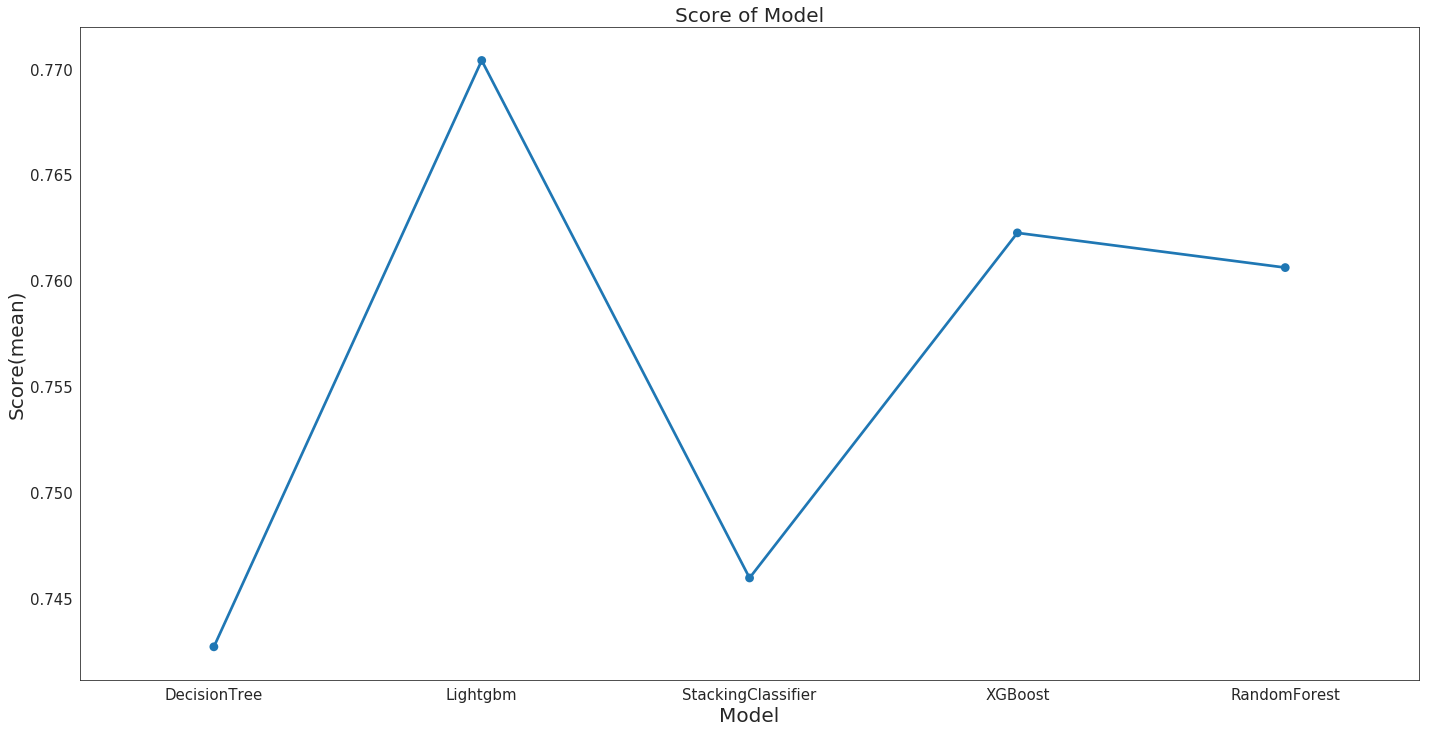

,score
DecisionTree,0.7427
Lightgbm,0.7704
RandomForest,0.7606
StackingClassifier,0.7460
XGBoost,0.7623


In [29]:
sns.set_style('white')
fig = mp.figure(figsize=(24, 12))
sns.pointplot(x=list(scores.keys()), y=[score for score in scores.values()], \
              markers=['o'], linestyle=['-'])
mp.ylabel('Score(mean)', size=20)
mp.tick_params(axis='y', labelsize=15)
mp.xlabel('Model', size=20)
mp.tick_params(axis='x', labelsize=15)
mp.title('Score of Model', size=20)
mp.show()

model_score = pd.DataFrame(scores, index=['score']).T
model_score.style\
           .format('{:.4f}', subset='score')\
           .highlight_max('score')


#### 透過圖表及表格可得知Lightgbm效果最好

### 預測結果

In [44]:
model_xgbc = xgbc.fit(df_train, Y)
test_pred_y = model_xgbc.predict(df_test)

target = pd.DataFrame(test_pred_y, columns=['Loan_Status'])
target['Loan_Status'] = target['Loan_Status'].map({0:'N', 1:'Y'})

Id = pd.read_csv('test.csv')
Id = pd.DataFrame(Id['Loan_ID'])

sub = Id.join(target).set_index('Loan_ID')
sub.to_csv('sub4.csv')
sub.head()

,Loan_Status
Loan_ID,
LP001015,Y
LP001022,Y
LP001031,Y
LP001035,N
LP001051,Y


#### 最終結果分數為76.38